In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler
import torch.optim as optim



In [3]:
df = pd.read_csv('./Dataset/pillow_features.csv')

In [4]:
df = df[df['Sales_volume'] != 0]
df = df.dropna()

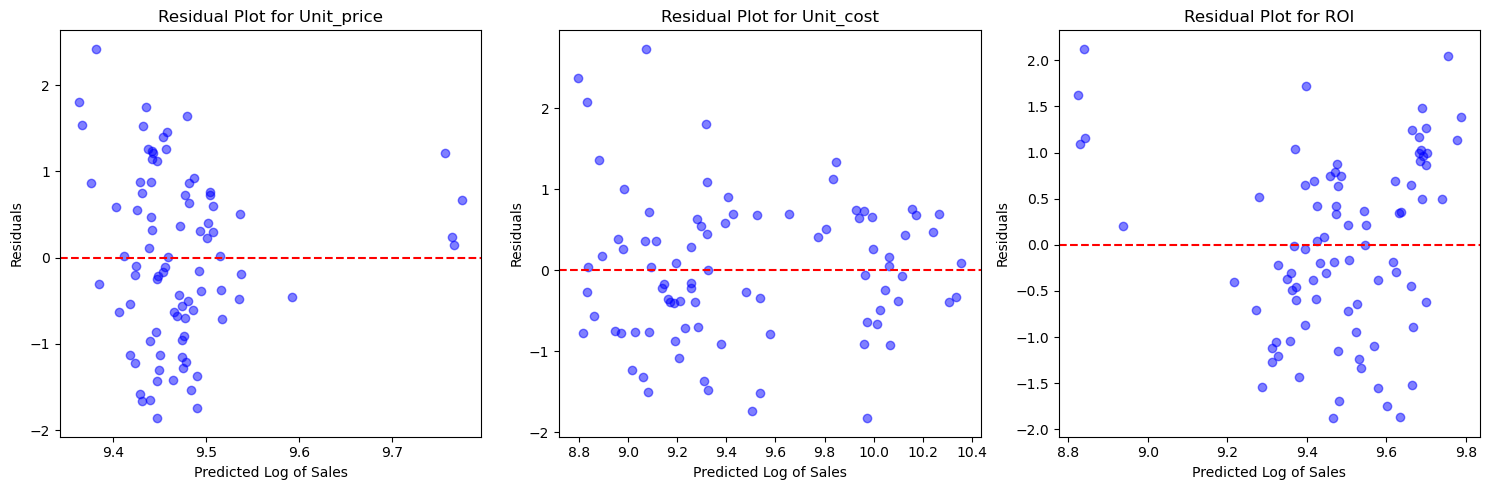

In [5]:
from sklearn.linear_model import LinearRegression

# 假设你的DataFrame为df，特征包括['成本', '售价', 'roi']，目标为'sales_target'
features = ['Unit_price', 'Unit_cost', 'ROI']
target = 'Target'

# 创建图形并设置大小
plt.figure(figsize=(15, 5))

# 检查目标列中是否有非正数值，避免在取对数时出现错误
df[target] = df[target].clip(lower=1)

for i, feature in enumerate(features):
    plt.subplot(1, len(features), i+1)
    
    # 对目标变量取对数
    log_target = np.log(df[target])
    
    # 拟合线性回归
    X = df[feature].values.reshape(-1, 1)
    y = log_target
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    # 计算残差
    residuals = y - y_pred

    # 绘制残差图
    plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')  # 添加 y=0 参考线

    # 图表标题和标签
    plt.title(f'Residual Plot for {feature}')
    plt.xlabel('Predicted Log of Sales')
    plt.ylabel('Residuals')

# 显示图像
plt.tight_layout()
plt.show()

In [6]:
version1 = df[df['Version'] == 1]
version1['Month'] = pd.date_range(start='2016-09', end = '2018-02',  freq='M').strftime('%Y-%m')

/var/folders/2h/fq3p7z3j28jcb6tmxr2w73wh0000gn/T/ipykernel_3940/3521662546.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  version1['Month'] = pd.date_range(start='2016-09', end = '2018-02',  freq='M').strftime('%Y-%m')


/var/folders/2h/fq3p7z3j28jcb6tmxr2w73wh0000gn/T/ipykernel_3940/273059075.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  version1['Month'] = pd.date_range(start='2016-09', end = '2018-02',  freq='M').strftime('%Y-%m')


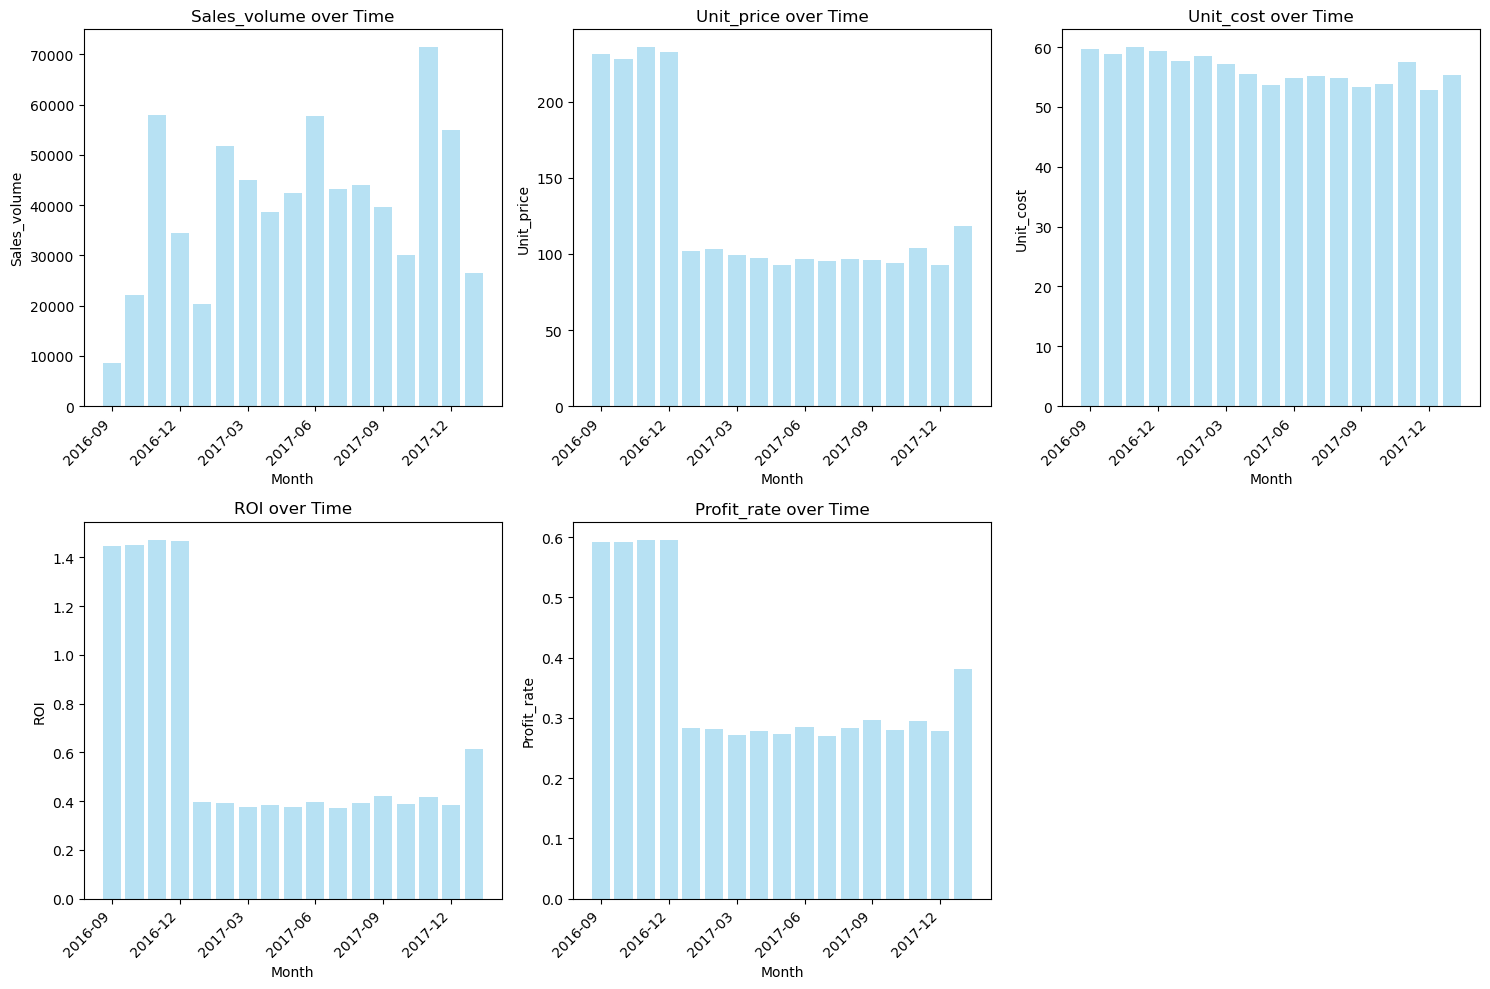

In [7]:
version1 = df[df['Version'] == 1]
version1['Month'] = pd.date_range(start='2016-09', end = '2018-02',  freq='M').strftime('%Y-%m')

dates = version1['Month'].values
# The columns of interest for the user
columns_of_interest = ['Sales_volume','Unit_price','Unit_cost', 'ROI','Profit_rate']

# Creating subplots for each feature
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot bar charts for each feature in separate subplots, using 'Month' as x-axis
for idx, column in enumerate(columns_of_interest):
    axes[idx].bar(dates, version1[column],color='skyblue', alpha = 0.6)
    axes[idx].set_ylabel(column)
    axes[idx].set_xlabel('Month')
    axes[idx].set_title(f'{column} over Time')
    
    # 每三个月显示一个日期
    xticks_positions = range(0, len(dates), 3)
    xticks_labels = [dates[i] for i in xticks_positions]
    axes[idx].set_xticks(xticks_positions)
    axes[idx].set_xticklabels(xticks_labels, rotation=45, ha='right')
    
    

# Remove the extra subplot (since we only have 5 features but 6 subplots)
fig.delaxes(axes[-1])

# Final adjustments to layout
plt.tight_layout()
plt.show()

In [8]:
version2 = df[df['Version'] == 2]
version2

,Month,Sales_volume,Revenue,Cost,Promotion_expense,Profit,Version,Unit_price,Unit_cost,ROI,Profit_rate,Target,Time_to_peak,Total_sales
19,2,11393.0,1.411787e+06,642447.74,211767.976575,5.575708e+05,2,123.917011,56.389690,0.652728,0.394940,24579.0,4,252866.0
20,3,24579.0,3.018974e+06,1385720.01,452846.075400,1.180408e+06,2,122.827366,56.378209,0.642026,0.390996,27689.0,4,252866.0
21,4,27689.0,3.137503e+06,1423954.76,470625.432000,1.242923e+06,2,113.312250,51.426731,0.656041,0.396150,31195.0,4,252866.0
22,5,31195.0,3.483733e+06,1555116.23,522559.908525,1.406057e+06,2,111.675997,49.851458,0.676745,0.403606,26911.0,4,252866.0
23,6,26911.0,3.269156e+06,1528719.08,490373.460450,1.250064e+06,2,121.480302,56.806476,0.619122,0.382381,16692.0,4,252866.0
24,7,16692.0,2.031401e+06,921020.98,304710.185925,8.056701e+05,2,121.699092,55.177389,0.657298,0.396608,19901.0,4,252866.0
25,8,19901.0,2.465372e+06,1118475.75,369805.769355,9.770903e+05,2,123.881805,56.201987,0.656522,0.396326,18148.0,4,252866.0
26,9,18148.0,2.230768e+06,1008723.07,334615.213695,8.874298e+05,2,122.920878,55.583154,0.660615,0.397814,28545.0,4,252866.0
27,10,28545.0,3.238344e+06,1388997.89,485751.649170,1.363595e+06,2,113.446990,48.659937,0.727348,0.421078,24687.0,4,252866.0
28,11,24687.0,3.155006e+06,1393609.69,473250.975000,1.288146e+06,2,127.800320,56.451156,0.690006,0.408286,9350.0,4,252866.0


/var/folders/2h/fq3p7z3j28jcb6tmxr2w73wh0000gn/T/ipykernel_3940/1273565655.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  version2['Month'] = pd.date_range(start='2018-02', end = '2019-02',  freq='M').strftime('%Y-%m')


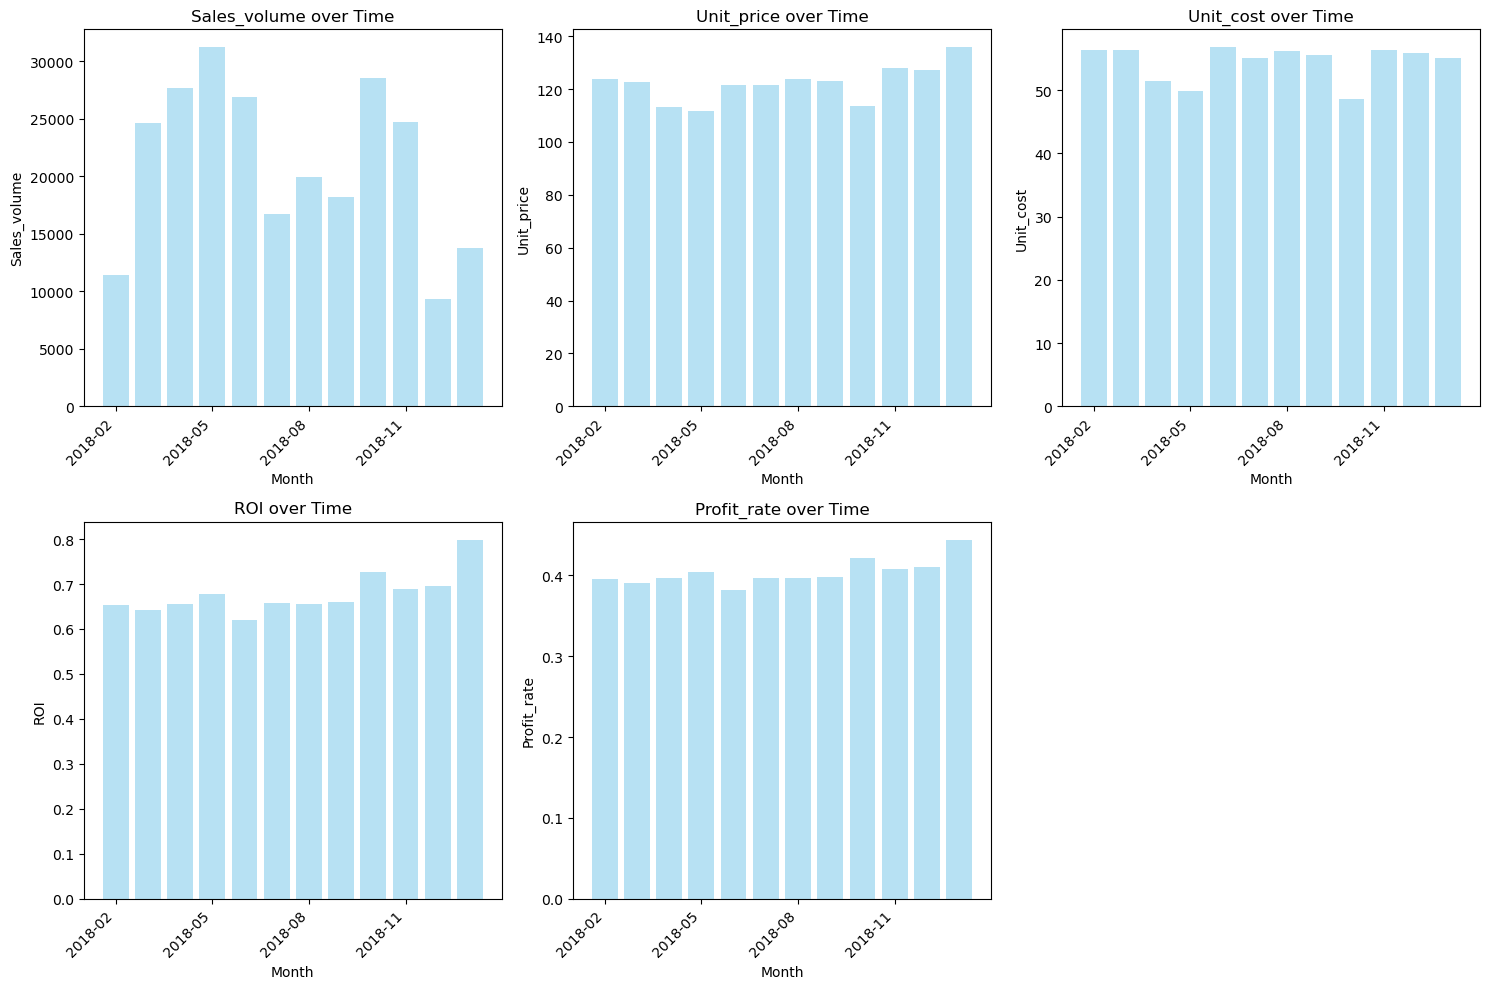

In [9]:
version2 = df[df['Version'] == 2]
version2['Month'] = pd.date_range(start='2018-02', end = '2019-02',  freq='M').strftime('%Y-%m')

dates = version2['Month'].values
# The columns of interest for the user
columns_of_interest = ['Sales_volume','Unit_price','Unit_cost', 'ROI','Profit_rate']

# Creating subplots for each feature
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot bar charts for each feature in separate subplots, using 'Month' as x-axis
for idx, column in enumerate(columns_of_interest):
    axes[idx].bar(dates, version2[column],color='skyblue', alpha = 0.6)
    axes[idx].set_ylabel(column)
    axes[idx].set_xlabel('Month')
    axes[idx].set_title(f'{column} over Time')
    
    # 每三个月显示一个日期
    xticks_positions = range(0, len(dates), 3)
    xticks_labels = [dates[i] for i in xticks_positions]
    axes[idx].set_xticks(xticks_positions)
    axes[idx].set_xticklabels(xticks_labels, rotation=45, ha='right')
    
    

# Remove the extra subplot (since we only have 5 features but 6 subplots)
fig.delaxes(axes[-1])

# Final adjustments to layout
plt.tight_layout()
plt.show()


In [10]:
version3 = df[df['Version'] == 3]
version3

,Month,Sales_volume,Revenue,Cost,Promotion_expense,Profit,Version,Unit_price,Unit_cost,ROI,Profit_rate,Target,Time_to_peak,Total_sales
32,2,8528.0,1.164459e+06,475573.01,1.746688e+05,5.142167e+05,3,136.545322,55.766066,0.790808,0.441593,11503.0,6,612542.0
33,3,11503.0,1.564528e+06,655785.07,2.346792e+05,6.740638e+05,3,136.010436,57.009917,0.756980,0.430842,22991.0,6,612542.0
34,4,22991.0,2.656898e+06,1089322.59,3.985347e+05,1.169041e+06,3,115.562515,47.380392,0.785721,0.440002,33190.0,6,612542.0
35,5,33190.0,3.731470e+06,1570674.94,5.597206e+05,1.601075e+06,3,112.427550,47.323740,0.751539,0.429073,67626.0,6,612542.0
36,6,67626.0,4.859027e+06,2998989.64,7.288541e+05,1.131184e+06,3,71.851469,44.346696,0.303442,0.232800,133605.0,6,612542.0
37,7,133605.0,8.550884e+06,5481305.90,1.282633e+06,1.786946e+06,3,64.001229,41.026203,0.264187,0.208978,71023.0,6,612542.0
38,8,71023.0,4.642571e+06,2944223.03,6.963857e+05,1.001963e+06,3,65.367152,41.454501,0.275218,0.215821,54675.0,6,612542.0
39,9,54675.0,3.799821e+06,2298533.51,5.699732e+05,9.313144e+05,3,69.498328,42.039936,0.324669,0.245094,27897.0,6,612542.0
40,10,27897.0,2.242901e+06,1208093.07,3.364351e+05,6.983728e+05,3,80.399362,43.305483,0.452159,0.311370,21755.0,6,612542.0
41,11,21755.0,2.093891e+06,1020205.53,3.140836e+05,7.596017e+05,3,96.248717,46.895221,0.569293,0.362770,20117.0,6,612542.0


/var/folders/2h/fq3p7z3j28jcb6tmxr2w73wh0000gn/T/ipykernel_3940/161734812.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  version3['Month'] = pd.date_range(start='2019-02', end = '2021-04',  freq='M').strftime('%Y-%m')


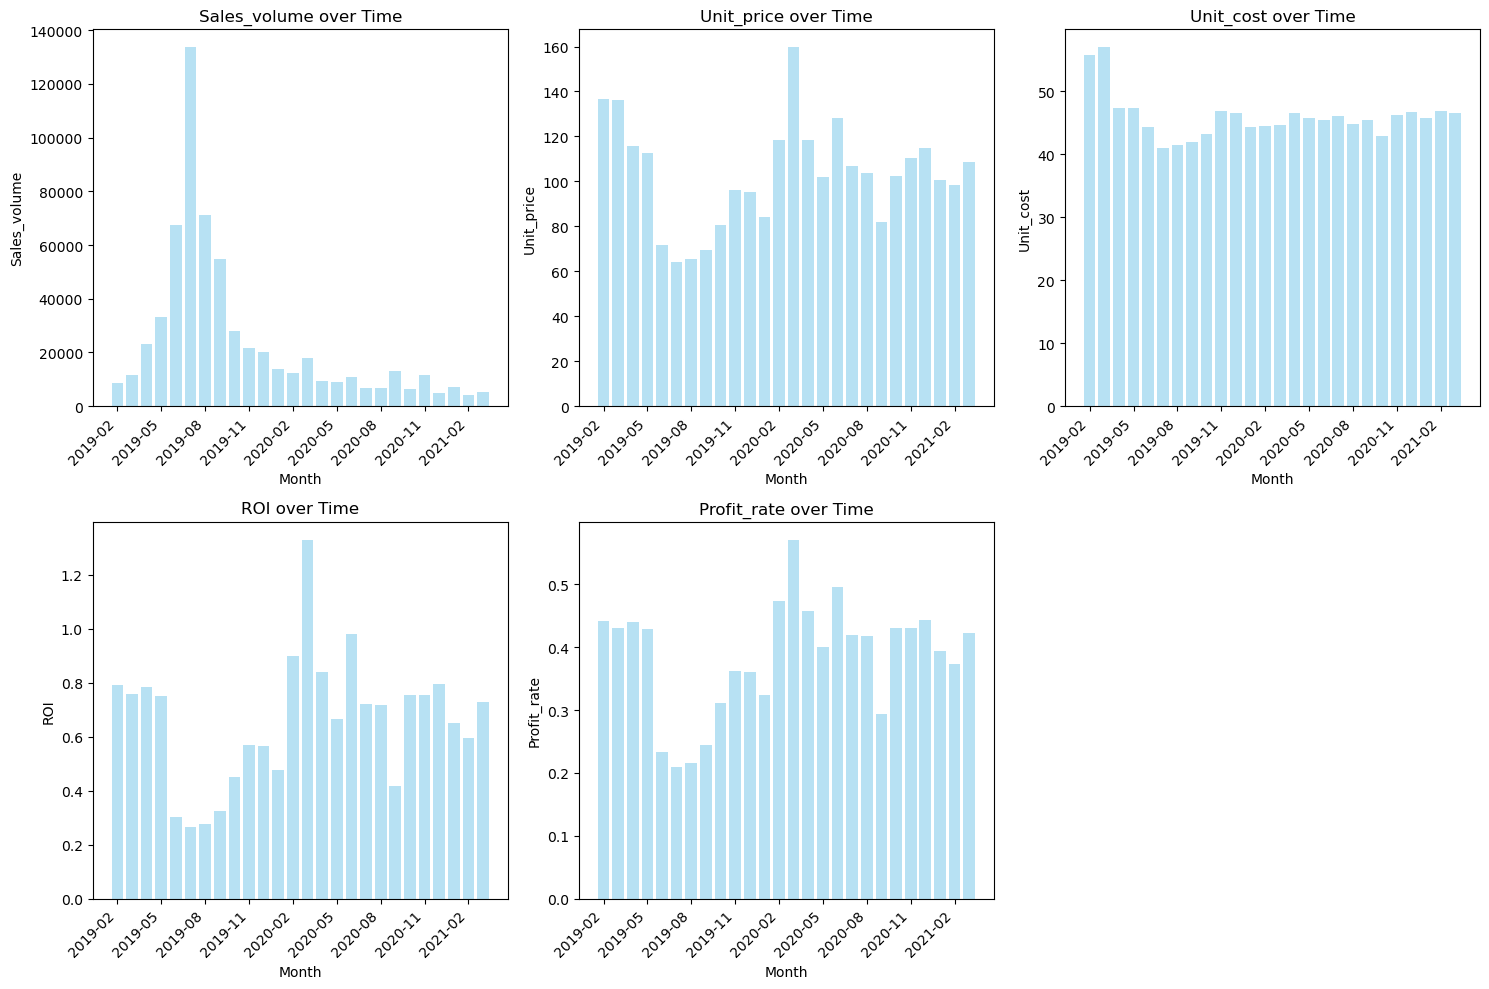

In [11]:
version3 = df[df['Version'] == 3]
version3['Month'] = pd.date_range(start='2019-02', end = '2021-04',  freq='M').strftime('%Y-%m')

dates = version3['Month'].values
# The columns of interest for the user
columns_of_interest = ['Sales_volume','Unit_price','Unit_cost', 'ROI','Profit_rate']

# Creating subplots for each feature
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot bar charts for each feature in separate subplots, using 'Month' as x-axis
for idx, column in enumerate(columns_of_interest):
    axes[idx].bar(dates, version3[column],color='skyblue', alpha = 0.6)
    axes[idx].set_ylabel(column)
    axes[idx].set_xlabel('Month')
    axes[idx].set_title(f'{column} over Time')
    
    # 每三个月显示一个日期
    xticks_positions = range(0, len(dates), 3)
    xticks_labels = [dates[i] for i in xticks_positions]
    axes[idx].set_xticks(xticks_positions)
    axes[idx].set_xticklabels(xticks_labels, rotation=45, ha='right')
    
    

# Remove the extra subplot (since we only have 5 features but 6 subplots)
fig.delaxes(axes[-1])

# Final adjustments to layout
plt.tight_layout()
plt.show()


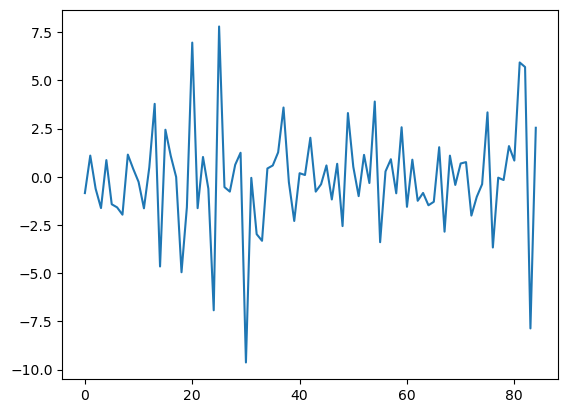

In [12]:
plt.plot(np.diff(df['Unit_cost'].values))

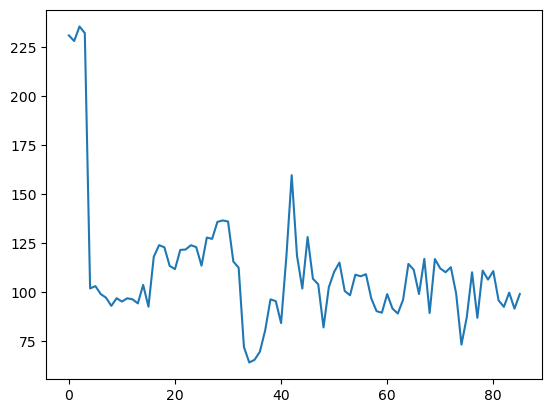

In [13]:
plt.plot(df['Unit_price'].values)

In [14]:
cor_features = ['Unit_price', 'Unit_cost', 'ROI', 'Profit_rate']
df_cor_features = df[cor_features]
# 使用 pd.date_range() 创建从 2016 年 9 月开始，以月份为频率的日期索引
date_index = pd.date_range(start='2016-09', periods=len(df_cor_features), freq='M')

# 将该日期索引赋值给 DataFrame 的 index
df_cor_features.index = date_index

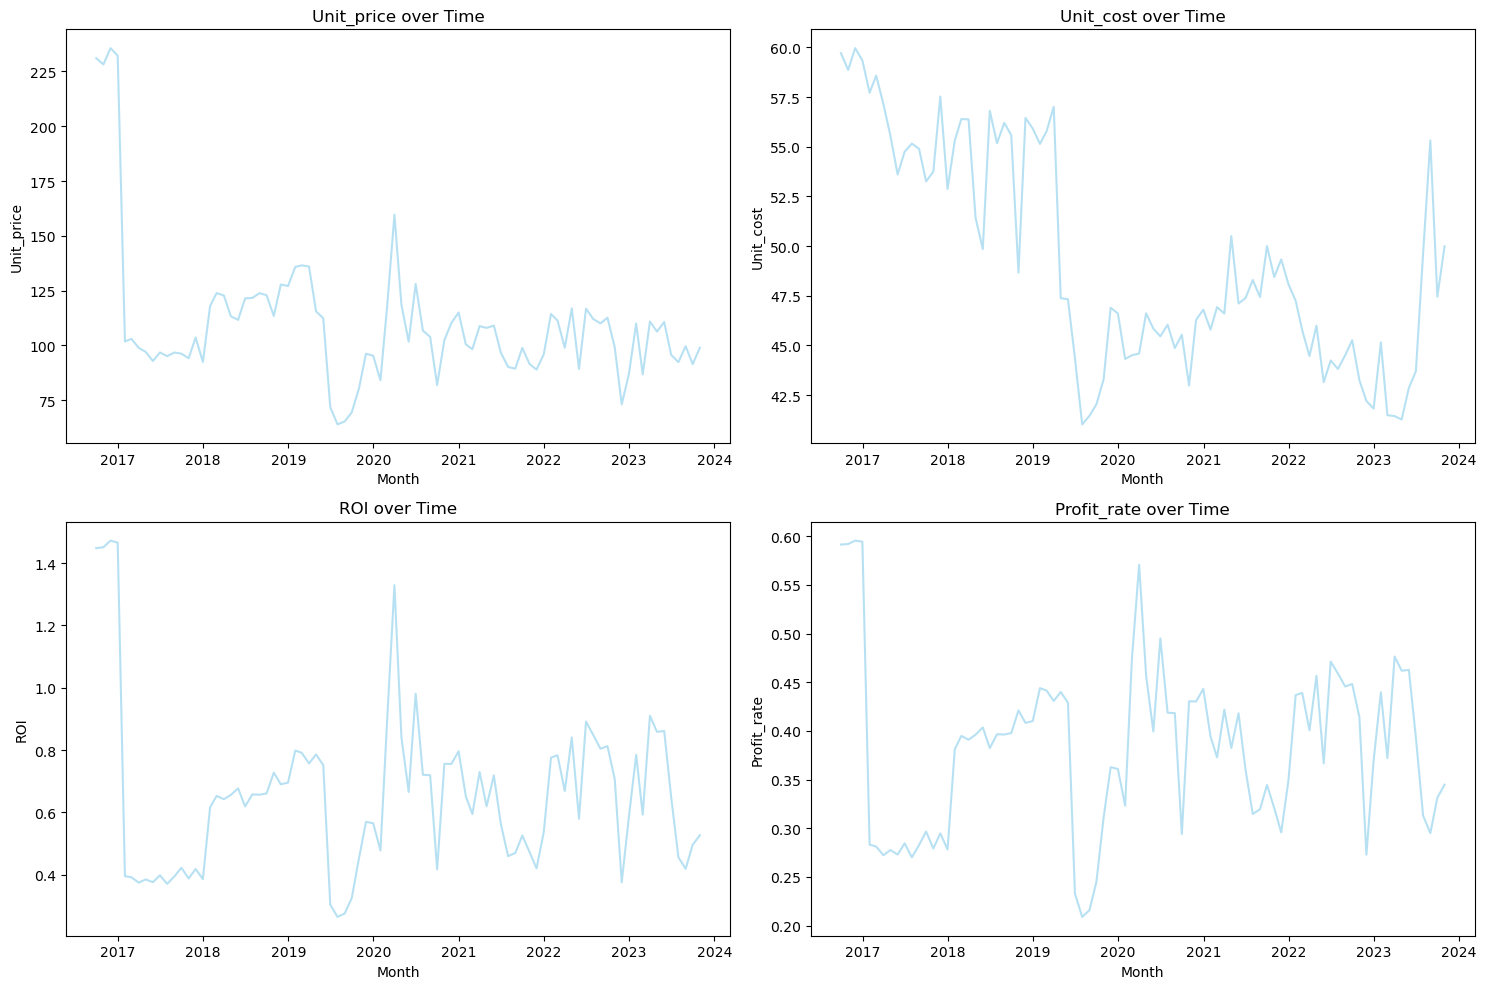

In [15]:
# Creating subplots for each feature
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot bar charts for each feature in separate subplots, using 'Month' as x-axis
for idx, column in enumerate(df_cor_features.columns):
    axes[idx].plot(df_cor_features[column],color='skyblue', alpha = 0.6)
    axes[idx].set_ylabel(column)
    axes[idx].set_xlabel('Month')
    axes[idx].set_title(f'{column} over Time')
    
    

# Final adjustments to layout
plt.tight_layout()
plt.show()

In [16]:
 # 去掉前四个值作为离群点
df_cor_features = df_cor_features[4:]
df_cor_features

,Unit_price,Unit_cost,ROI,Profit_rate
2017-01-31,101.821270,57.716305,0.395013,0.283161
2017-02-28,103.004670,58.578907,0.391398,0.281299
2017-03-31,98.940003,57.152753,0.374286,0.272349
2017-04-30,97.088720,55.565122,0.384442,0.277687
2017-05-31,92.903957,53.599067,0.375649,0.273070
...,...,...,...,...
2023-06-30,95.717707,43.700867,0.648642,0.393440
2023-07-31,92.408766,49.626801,0.455529,0.312964
2023-08-31,99.675908,55.315655,0.418530,0.295045
2023-09-30,91.487771,47.451899,0.495508,0.331331


In [17]:
df_differenced = df_cor_features.diff().dropna()
df_differenced

,Unit_price,Unit_cost,ROI,Profit_rate
2017-02-28,1.183400,0.862602,-0.003614,-0.001862
2017-03-31,-4.064667,-1.426154,-0.017112,-0.008949
2017-04-30,-1.851283,-1.587631,0.010156,0.005338
2017-05-31,-4.184763,-1.966056,-0.008793,-0.004617
2017-06-30,3.912644,1.148393,0.022022,0.011454
...,...,...,...,...
2023-06-30,-14.948049,0.838755,-0.212476,-0.069248
2023-07-31,-3.308941,5.925934,-0.193113,-0.080476
2023-08-31,7.267142,5.688854,-0.036999,-0.017919
2023-09-30,-8.188137,-7.863755,0.076978,0.036286


In [18]:
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:i + time_step])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)
# 假设 df 是你的数据框，其中包含 ['cost', 'price', 'ROI', 'interest_rate']

data = df_cor_features.values

# 数据归一化
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# 创建整个时间序列数据集
time_step = 1  # 你可以调整时间步长
X, y = create_dataset(scaled_data, time_step)

# 转换为PyTorch张量
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# 数据集划分
train_size = len(scaled_data) - 12  # 最后12个月的数据作为测试集
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size :], y[train_size :]

In [21]:
# 2. 定义 LSTM 模型
class FeaturesLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(FeaturesLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden):
        lstm_out, hidden = self.lstm(x, hidden)
        predictions = self.fc(lstm_out)
        return predictions, hidden

# 参数设定
input_size = 4  # 输入的四个特征
hidden_size = 64  # 隐藏层神经元数量
output_size = 4  # 输出的四个特征
num_epochs = 100
learning_rate = 0.001

model = FeaturesLSTM(input_size, hidden_size, output_size)
criterion = nn.MSELoss()  # 损失函数
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

best_loss = float('inf')  # 初始化最佳损失值

num_epochs = 256  # 总的训练轮数
save_interval = 8  # 每8个epoch保存一次模型

for epoch in range(num_epochs):
    hidden = (torch.zeros(1, 1, hidden_size),
                      torch.zeros(1, 1, hidden_size))
    loss = 0.0
    for i in range(len(X_train)):
        x_input = X_train[i].view(1, 1, -1)  # 输入数据
        y_target = y_train[i].view(1, 1, -1)  # 
        y_pred, hidden = model(x_input, hidden)
        loss = loss + criterion(y_pred.view(-1), y_target.view(-1))
    loss = loss / X_train.shape[0]
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 每8个epoch测试一次
    if (epoch + 1) % save_interval == 0:
        model.eval()  # 设置模型为评估模式
        with torch.no_grad():
            # 使用最后一次训练后的 hidden state 预测测试集
            predictions = []
            input_data = X_test[0].view(1,1,-1)  # 测试集的初始输入 (1, time_step, features)

            for i in range(len(X_test)):
                pred, hidden = model(input_data, hidden)
                predictions.append(pred.numpy())
                input_data = pred.view(1,1,-1)  # 使用预测结果作为下一个时间步的输入

        predictions = np.array(predictions).reshape(-1, output_size)

        # 反归一化预测数据和实际数据
        predictions_rescaled = scaler.inverse_transform(predictions)
        y_test_rescaled = scaler.inverse_transform(y_test.numpy())

        # 计算测试集上的损失
        test_loss = criterion(torch.tensor(predictions, dtype=torch.float32), y_test)
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

        # 如果测试集的损失比最佳损失低，则保存模型
        if test_loss.item() < best_loss:
            best_loss = test_loss.item()
            torch.save(model.state_dict(), 'best_model_features.pth')
            print(f"Epoch [{epoch+1}], Test Loss Decreased: {best_loss:.4f}, Model Saved!")

Epoch [8/256], Loss: 0.1721, Test Loss: 0.1298
Epoch [8], Test Loss Decreased: 0.1298, Model Saved!
Epoch [16/256], Loss: 0.0947, Test Loss: 0.0666
Epoch [16], Test Loss Decreased: 0.0666, Model Saved!
Epoch [24/256], Loss: 0.0595, Test Loss: 0.0760
Epoch [32/256], Loss: 0.0465, Test Loss: 0.0390
Epoch [32], Test Loss Decreased: 0.0390, Model Saved!
Epoch [40/256], Loss: 0.0445, Test Loss: 0.0370
Epoch [40], Test Loss Decreased: 0.0370, Model Saved!
Epoch [48/256], Loss: 0.0413, Test Loss: 0.0401
Epoch [56/256], Loss: 0.0387, Test Loss: 0.0361
Epoch [56], Test Loss Decreased: 0.0361, Model Saved!
Epoch [64/256], Loss: 0.0357, Test Loss: 0.0322
Epoch [64], Test Loss Decreased: 0.0322, Model Saved!
Epoch [72/256], Loss: 0.0316, Test Loss: 0.0307
Epoch [72], Test Loss Decreased: 0.0307, Model Saved!
Epoch [80/256], Loss: 0.0299, Test Loss: 0.0329
Epoch [88/256], Loss: 0.0287, Test Loss: 0.0293
Epoch [88], Test Loss Decreased: 0.0293, Model Saved!
Epoch [96/256], Loss: 0.0282, Test Loss: 0

In [23]:
predictions_rescaled, y_test_rescaled

(array([[ 92.7275    ,  43.39799   ,   0.58967847,   0.36673668],
        [ 95.397606  ,  44.188644  ,   0.6214006 ,   0.37581578],
        [ 99.690186  ,  44.994366  ,   0.6601573 ,   0.39093217],
        [104.15587   ,  45.69128   ,   0.6959122 ,   0.40612125],
        [107.53265   ,  46.159603  ,   0.7205418 ,   0.4171423 ],
        [109.097786  ,  46.358524  ,   0.72915906,   0.42153957],
        [108.697754  ,  46.317406  ,   0.72076964,   0.41880572],
        [106.69284   ,  46.118683  ,   0.69847953,   0.41023427],
        [103.80294   ,  45.871094  ,   0.66866976,   0.3983926 ],
        [100.864075  ,  45.675     ,   0.6389789 ,   0.38630098],
        [ 98.57022   ,  45.59189   ,   0.6158393 ,   0.37655237]],
       dtype=float32),
 array([[ 87.08675   ,  41.82032   ,   0.58676136,   0.36978552],
        [110.05902   ,  45.158157  ,   0.7847309 ,   0.43969145],
        [ 86.82034   ,  41.490437  ,   0.59263974,   0.37211162],
        [110.935356  ,  41.44279   ,   0.9099422 ,  

In [24]:
predictions_rescaled.shape

(11, 4)

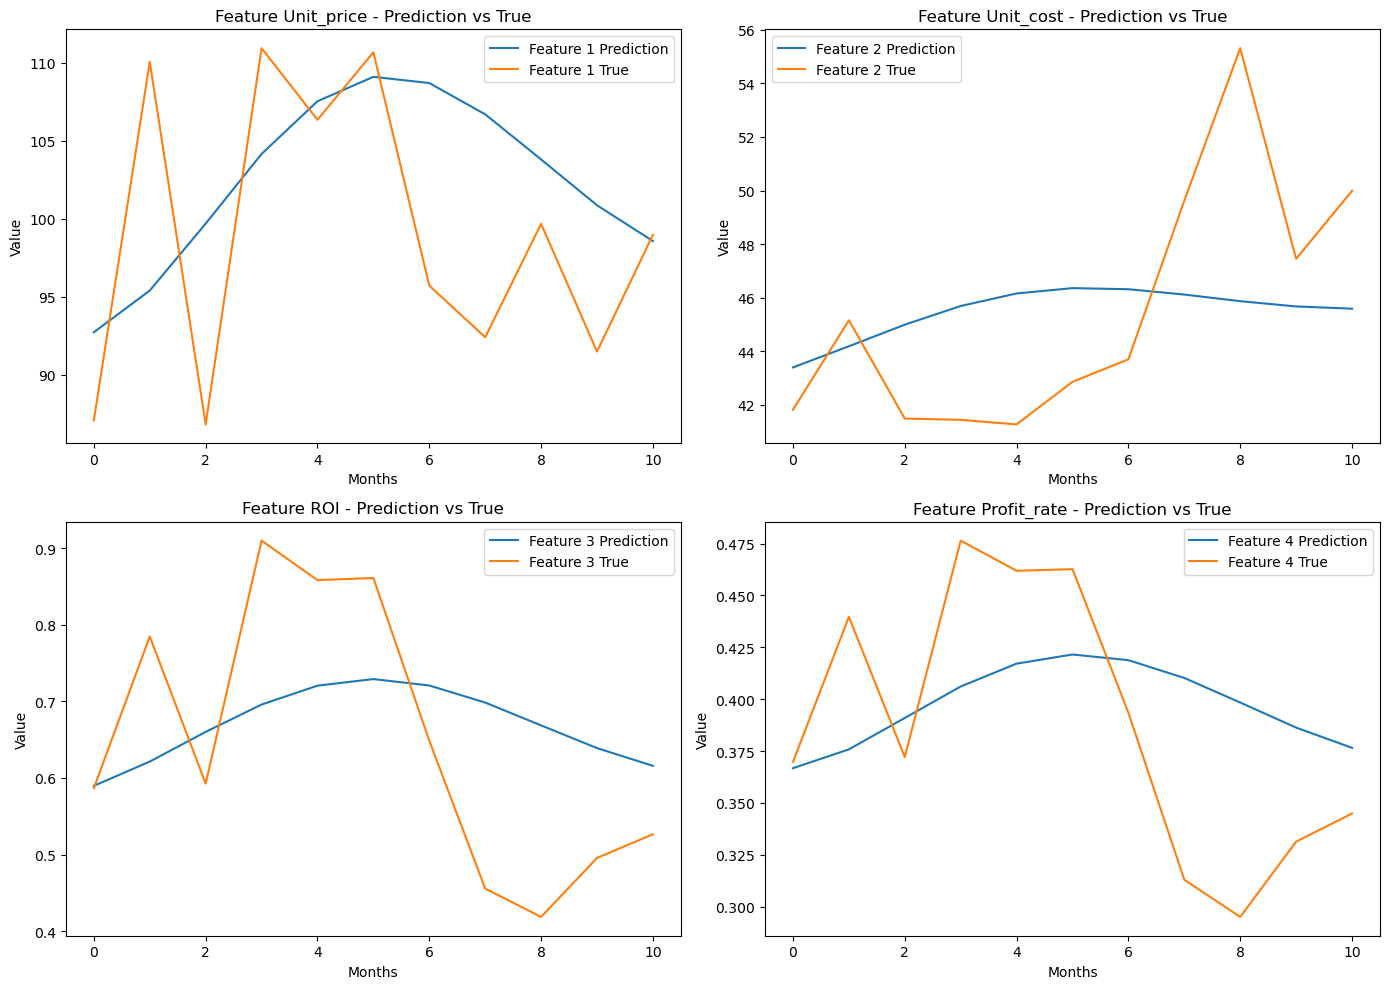

In [26]:
# 创建图表
plt.figure(figsize=(14, 10))

# 绘制每个特征的图
for i in range(4):
    feature = cor_features[i]
    plt.subplot(2, 2, i+1)
    plt.plot(predictions_rescaled[:, i], label=f'Feature {i+1} Prediction')
    plt.plot(y_test_rescaled[:, i], label=f'Feature {i+1} True')
    plt.title(f'Feature {feature} - Prediction vs True')
    plt.xlabel('Months')
    plt.ylabel('Value')
    plt.legend()

plt.tight_layout()
plt.show()

In [28]:
model.eval()
hidden = (torch.zeros(1, 1, hidden_size),
                      torch.zeros(1, 1, hidden_size))
with torch.no_grad():
    # 使用最后一次训练后的 hidden state 预测测试集
    predictions = []
    input_data = torch.tensor(np.array([100, 50, 0.6, 0.35]), dtype = torch.float32).view(1,1,-1)  # 测试集的初始输入 (1, time_step, features)

    for i in range(len(X_test)):
        pred, hidden = model(input_data, hidden)
        predictions.append(pred.numpy())
        input_data = pred.view(1,1,-1)  # 使用预测结果作为下一个时间步的输入

predictions = np.array(predictions).reshape(-1, output_size)

# 反归一化预测数据和实际数据
predictions_rescaled = scaler.inverse_transform(predictions)

predictions_rescaled

array([[ 1.45263092e+02,  7.95723801e+01,  7.96984434e-01,
         4.00265634e-01],
       [ 1.37375946e+02,  7.55584030e+01,  5.68678141e-01,
         3.37567866e-01],
       [ 1.24279991e+02,  7.04797211e+01,  3.29350412e-01,
         2.88529068e-01],
       [ 1.05344284e+02,  6.46721725e+01,  1.27007931e-01,
         2.24723309e-01],
       [ 8.57058640e+01,  5.87960854e+01, -3.16020846e-02,
         1.64189056e-01],
       [ 6.89456482e+01,  5.36501808e+01, -1.14442825e-01,
         1.21852666e-01],
       [ 5.70139236e+01,  4.97696152e+01, -1.05690755e-01,
         1.05101086e-01],
       [ 5.14540329e+01,  4.74996376e+01, -3.07824276e-02,
         1.14313237e-01],
       [ 5.31138725e+01,  4.68110428e+01,  7.93811679e-02,
         1.44364372e-01],
       [ 6.04709282e+01,  4.72064476e+01,  1.95407569e-01,
         1.84942976e-01],
       [ 7.04272766e+01,  4.81261215e+01,  2.97797024e-01,
         2.27321982e-01]], dtype=float32)

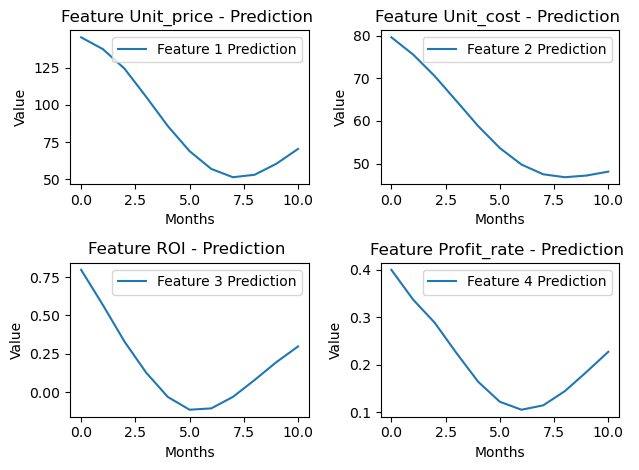

In [30]:
# 绘制每个特征的图
for i in range(4):
    feature = cor_features[i]
    plt.subplot(2, 2, i+1)
    plt.plot(predictions_rescaled[:, i], label=f'Feature {i+1} Prediction')
    #plt.plot(y_test_rescaled[:, i], label=f'Feature {i+1} True')
    plt.title(f'Feature {feature} - Prediction ')
    plt.xlabel('Months')
    plt.ylabel('Value')
    plt.legend()

plt.tight_layout()
plt.show()